# Homework 3
### Computational Network Analysis with R

## Part 1 - Network Analysis

In this part we will learn the basics of network analysis with the igraph library. The dataset is called dolphins and contains the friendship network of dolphins. 

**1.1 Install and import the igraph library.**

In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



**1.2 Read the documentation of read.graph and load the 'data/dolphins.gml' into the variable 'G'.**

In [2]:
?read.graph

read_graph {igraph},R Documentation
file,"The connection to read from. This can be a local file, or a http or ftp connection. It can also be a character string with the file name or URI."
format,"Character constant giving the file format. Right now as_edgelist, pajek, graphml, gml, ncol, lgl, dimacs and graphdb are supported, the default is edgelist. As of igraph 0.4 this argument is case insensitive."
...,"Additional arguments, see below."


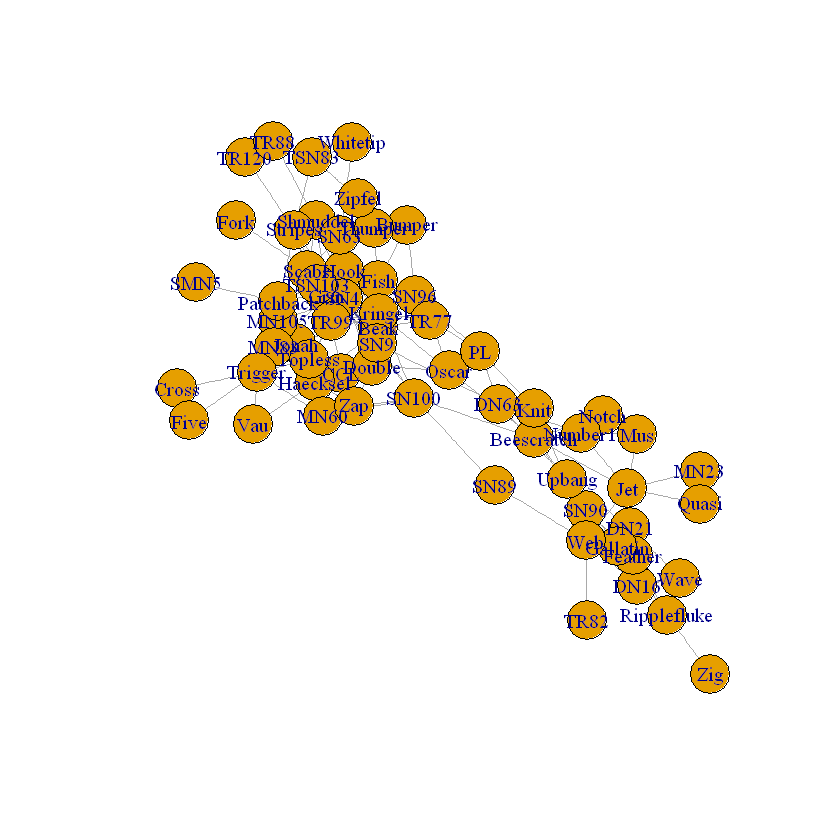

In [3]:
G <- read.graph("data/dolphins.gml","gml")
plot(G)

**1.3 Use the function 'degree' and find out the percentage of popular dolphins(with more than 5 friends)**

In [4]:
f <- degree(G)
f.mt5 <- degree(G)[degree(G)>5]
f.lt5 <- degree(G)[degree(G)<=5]
popdol <- length(f.mt5)/length(f)

cat(cat("~",round(popdol,2)*100), "%")

~ 45 %

**1.4 Use 'summary' on the network and explain what the result means.**

In [5]:
summary(G)

IGRAPH U--- 62 159 -- 
+ attr: id (v/n), label (v/c), sex (v/c)


Answer:

- IGRAPH: It's a graph object
- 62 nodes
- 159 edges
- U---: Undirected graph
- attribute "id": vertex is numerical
- attribute "label": vertex is a charater
- attribute "sex": vertix is a character

**1.5 Access one of the attributes with the following call: 'V(G)$myattribute'**

In [6]:
V(G)$id
V(G)$label
V(G)$sex

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[26] 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
[51] 50 51 52 53 54 55 56 57 58 59 60 61

[1] "Beak"        "Beescratch"  "Bumper"      "CCL"         "Cross"      
 [6] "DN16"        "DN21"        "DN63"        "Double"      "Feather"    
[11] "Fish"        "Five"        "Fork"        "Gallatin"    "Grin"       
[16] "Haecksel"    "Hook"        "Jet"         "Jonah"       "Knit"       
[21] "Kringel"     "MN105"       "MN23"        "MN60"        "MN83"       
[26] "Mus"         "Notch"       "Number1"     "Oscar"       "Patchback"  
[31] "PL"          "Quasi"       "Ripplefluke" "Scabs"       "Shmuddel"   
[36] "SMN5"        "SN100"       "SN4"         "SN63"        "SN89"       
[41] "SN9"         "SN90"        "SN96"        "Stripes"     "Thumper"    
[46] "Topless"     "TR120"       "TR77"        "TR82"        "TR88"       
[51] "TR99"        "Trigger"     "TSN103"      "TSN83"       "Upbang"     
[56] "Vau"         "Wave"        "Web"         "Whitetip"    "Zap"        
[61] "Zig"         "Zipfel"

[1] "M" "M" "M" "F" "M" "F" "M" "M" "F" "M" "F" "F" "M" "M" "F" "M" "F" "M" "M"
[20] "M" "F" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "U" "F" "F" "M" "F" "F"
[39] "F" "F" "F" "M" "M" "F" "M" "M" "F" "F" "U" "F" "F" "F" "F" "U" "M" "F" "F"
[58] "M" "F" "U" "M" "M"

**1.6 What is the ratio between male and females?**

In [7]:
dol.all <- length(V(G)$sex)
dol.m <- length(V(G)$sex[V(G)$sex == "M"])
dol.f <- length(V(G)$sex[V(G)$sex == "F"])
dol.u <- length(V(G)$sex[V(G)$sex == "U"])

cat(cat("percentage of female dolphins from population: ~",round(dol.f / dol.all,2)*100), "%\n")
cat(cat("percentage of male dolphins from population: ~",round(dol.m / dol.all,2)*100), "%\n")
cat(cat("ratio: female to male dolphins in population: ~",round(dol.f / dol.m,2)*100), "%\n")
cat(cat("ratio: male to female dolphins in population: ~",round(dol.m / dol.f,2)*100), "%")

percentage of female dolphins from population: ~ 40 %
percentage of male dolphins from population: ~ 53 %
ratio: female to male dolphins in population: ~ 76 %
ratio: male to female dolphins in population: ~ 132 %

**1.6 Whats the average degree of the nodes?**

In [8]:
num <- sum(degree(G))
all <- length(degree(G))
mean <- num/all
cat("average degree: ~",round(mean))

average degree: ~ 5

**1.7 How is the degree distributed? Is it normally distributed? Left or right skewed? Or something else? Use a histogram or boxplot.**

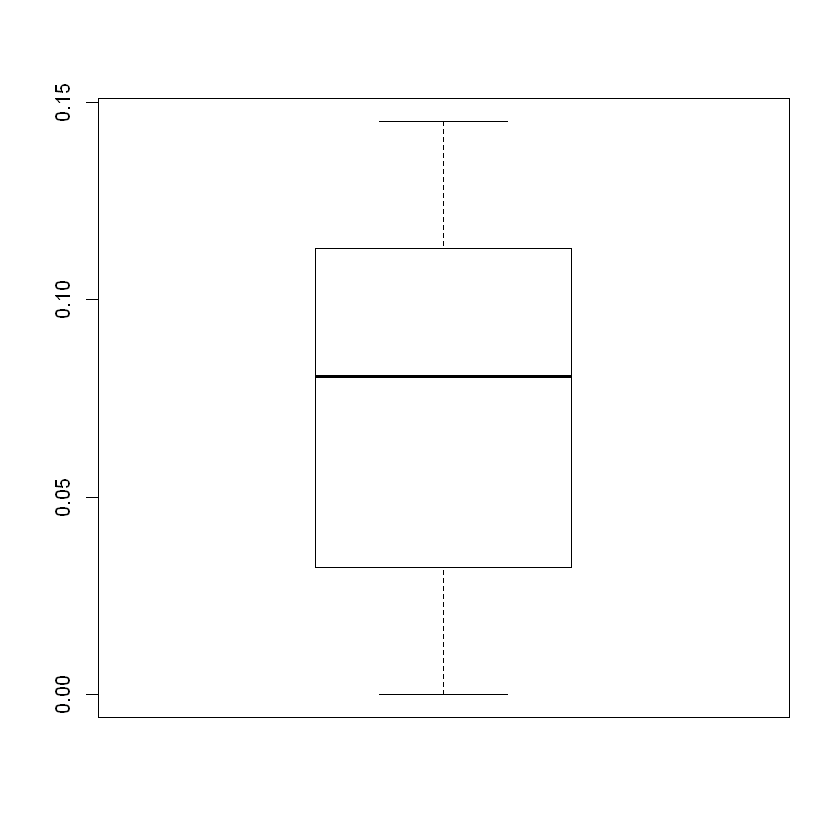

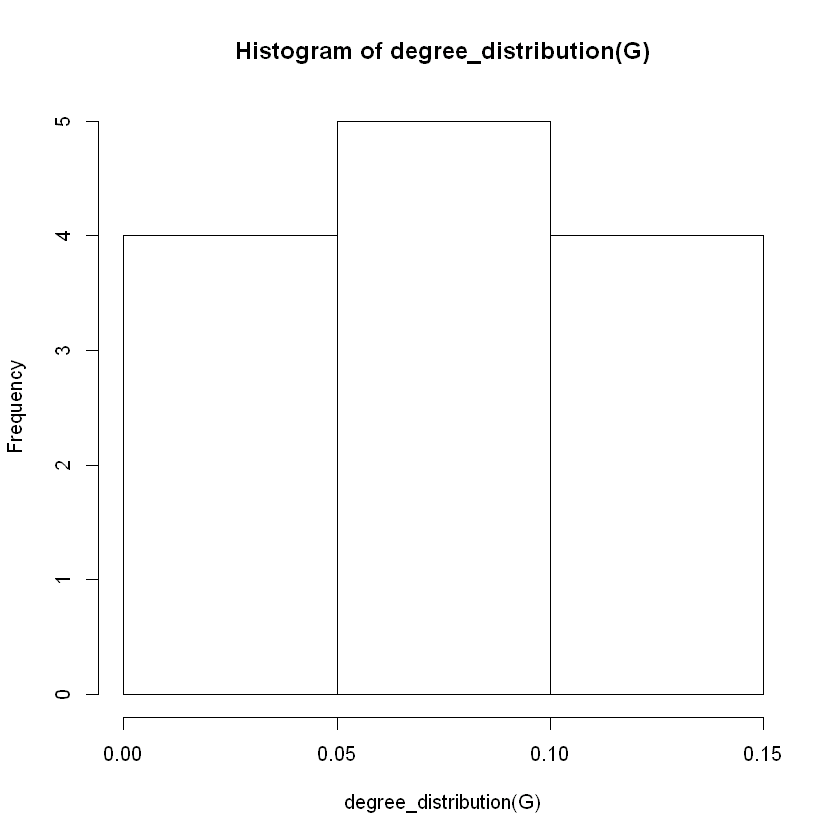

In [9]:
boxplot(degree_distribution(G))
hist(degree_distribution(G))

**1.8 Whats the average number of friendships males have? Do the same for females.** 

In [10]:
mdf <- degree(G)[V(G)$sex == "M"]
fdf <- degree(G)[V(G)$sex == "F"]
udf <- degree(G)[V(G)$sex == "U"]

cat(cat("average number of friendships male dolphins have: ~",round(sum(mdf) / length(mdf),0)),"\n")
cat(cat("average number of friendships female dolphins have: ~",round(sum(fdf) / length(fdf),0)),"\n")
cat(cat("average number of friendships unisex dolphins have: ~",round(sum(udf) / length(udf),0)),"\n")

average number of friendships male dolphins have: ~ 5 
average number of friendships female dolphins have: ~ 6 
average number of friendships unisex dolphins have: ~ 3 


**1.9 Plot "G". I know you want it. Go ahead.**

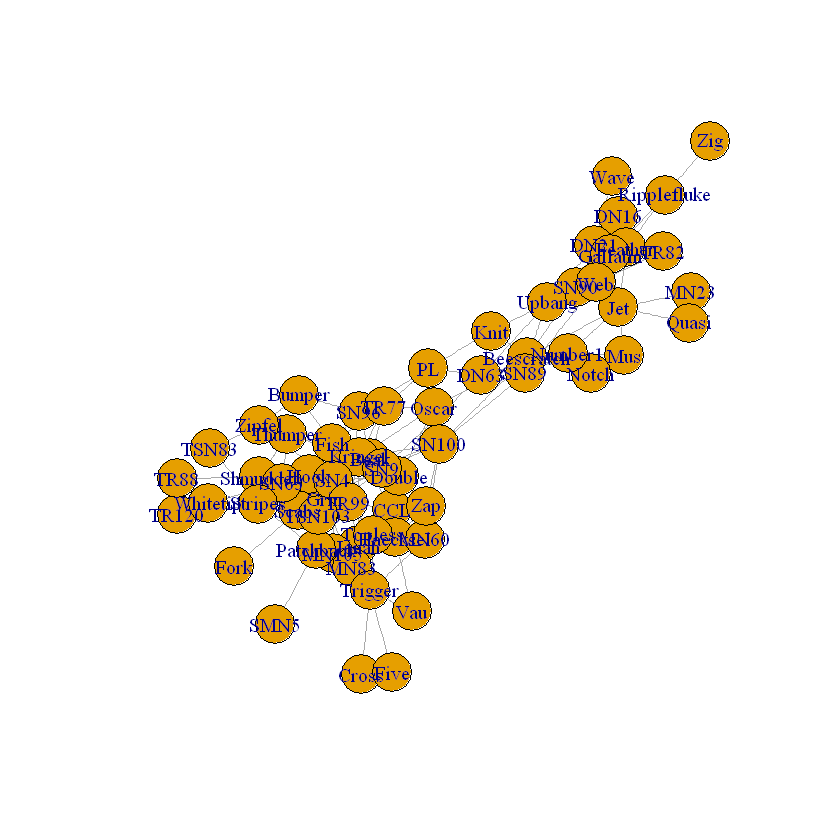

In [11]:
plot.igraph(G)

This gives you an impression of the underlying network. Plotting very big networks rarely helps though. Lets make the plot more readable.

**1.10 Reduce in the plot the node size to 5**

*hint: function=plot.igraph, parameter=vertex.size*

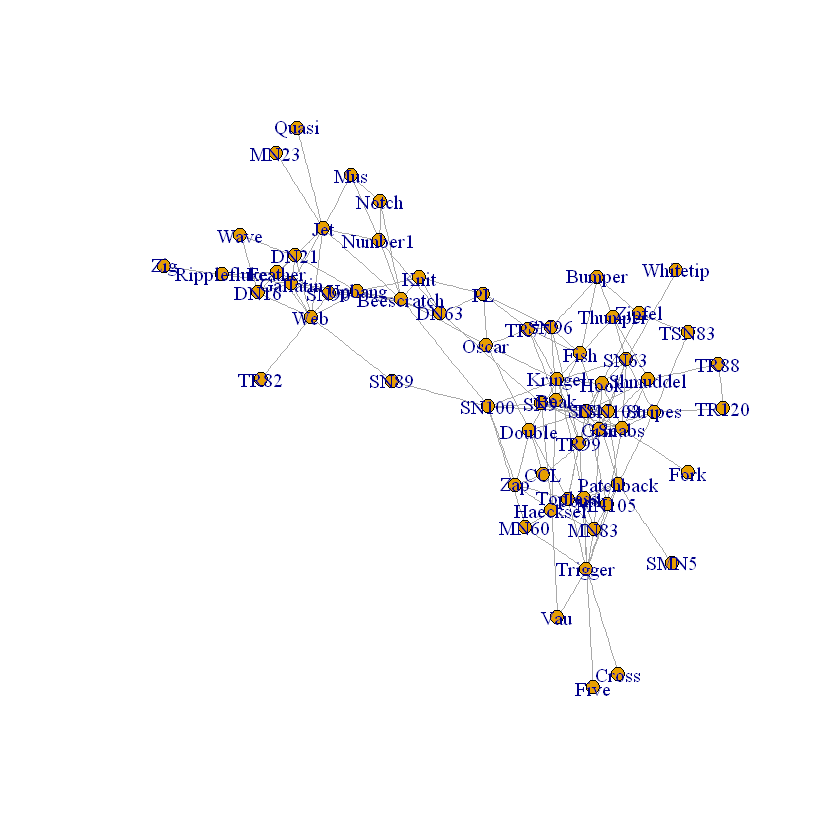

In [12]:
plot.igraph(G, vertex.size = 5)

**1.11 Now additionally remove the pesky names which make it more unreadable**

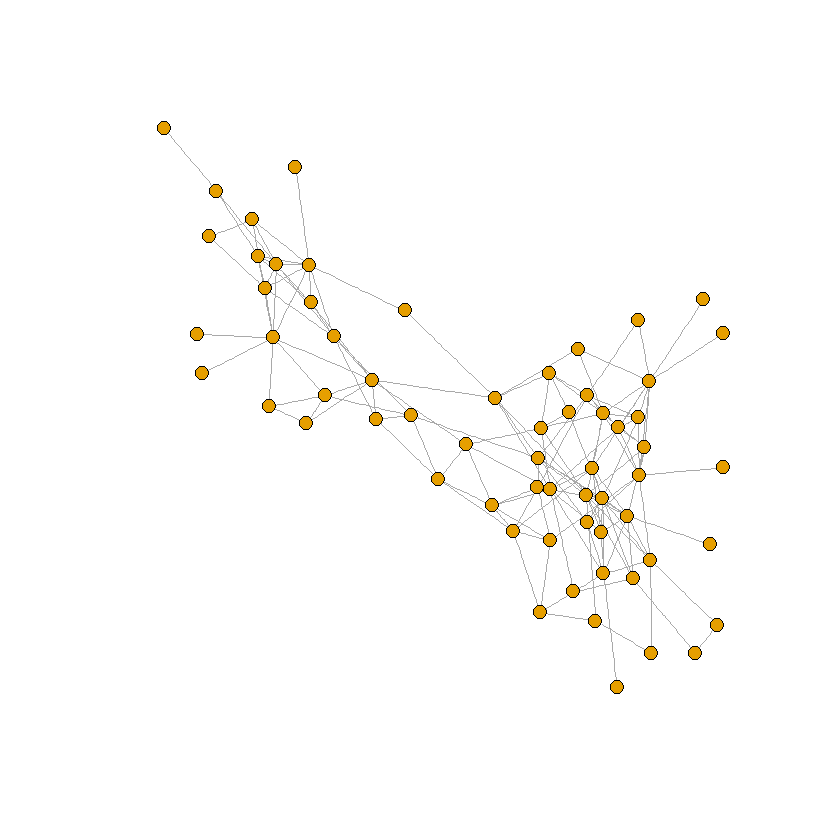

In [13]:
plot.igraph(G, vertex.size = 5, vertex.label = NA)

This looks war prettier. Does it not? Orange is nice, but I personally like red. Like your passion for this homework ;)

**1.12 Change the colour of all nodes to red. Use the parameter vertex.color.**

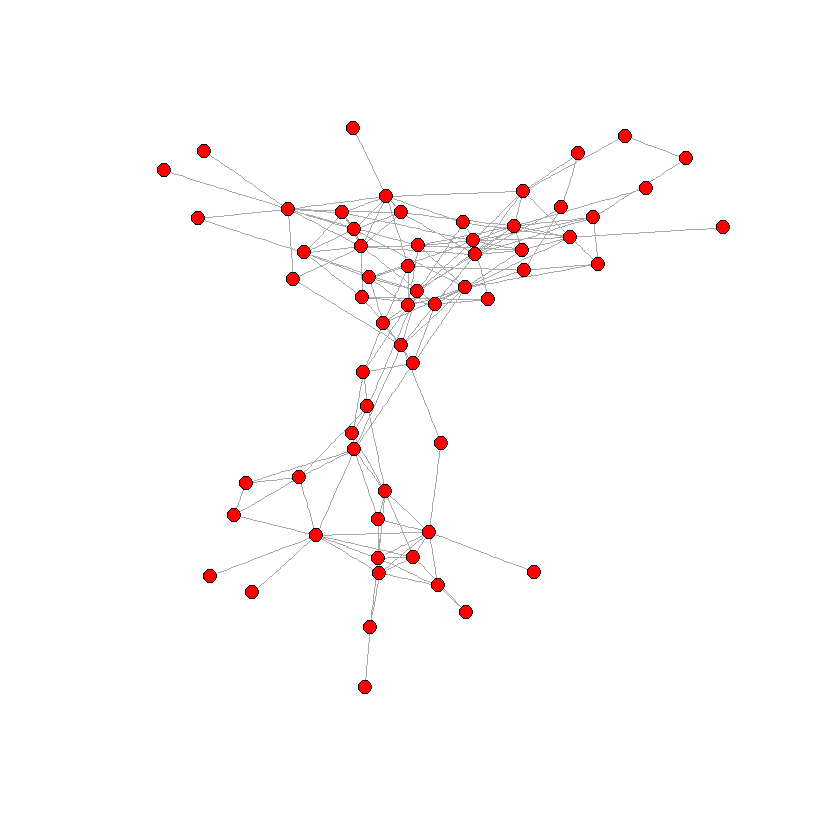

In [14]:
plot.igraph(G, vertex.size = 5, vertex.label = NA, vertex.color = 'red')

You can also set the color by adding an attribute named "color" to the vertices: 

`V(G)$color = 'red'`

**1.13 Plot the graph blue with the new method.**

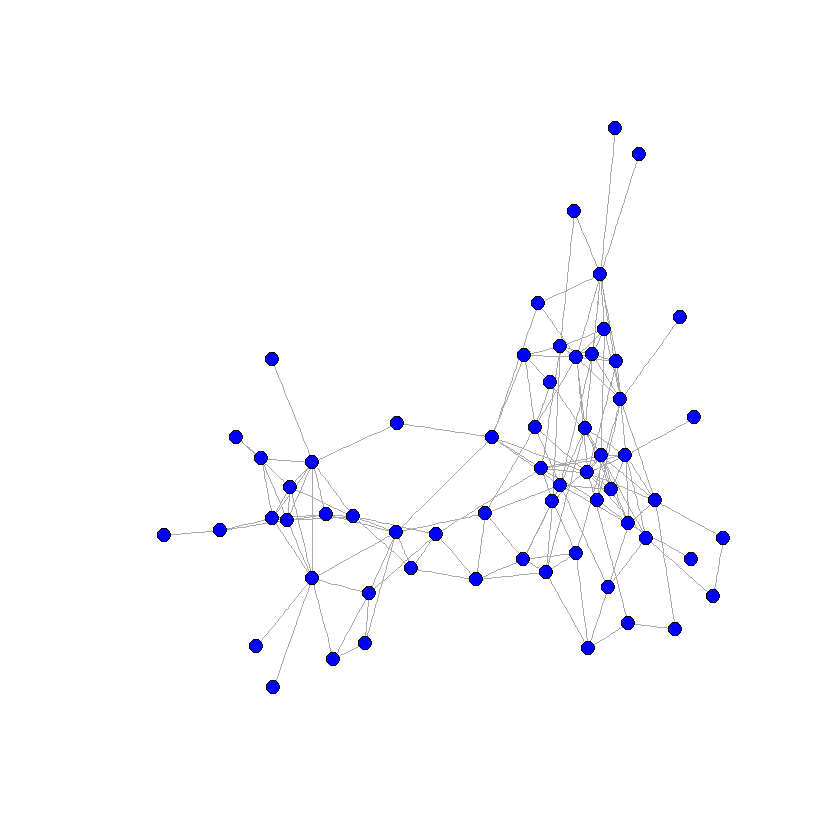

In [15]:
V(G)$color = 'blue'
plot.igraph(G, vertex.size = 5, vertex.label = NA)

**1.14 Lets get crazy. Color the nodes of the females pink and the males lightblue. If you think the association of color pink with women is oppression and you firmly stand against this insanity, switching the colors is also allowed. **

*Hint: Since you colored all nodes blue before, it may be necessary to reset the color*

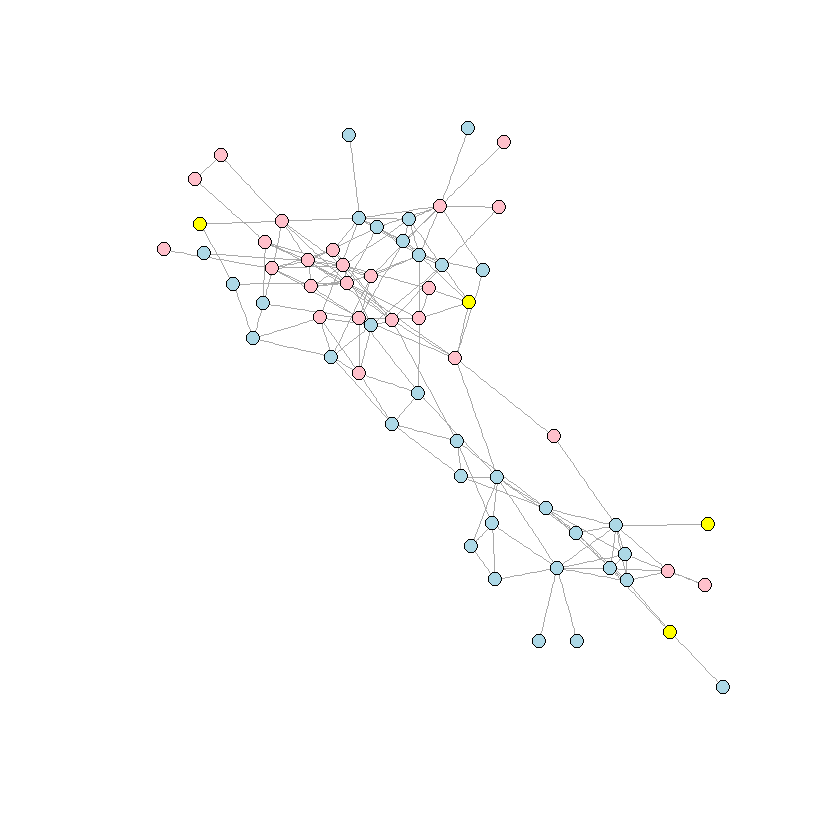

In [16]:
V(G)$color = 'white'
V(G)$color[V(G)$sex=="F"] = 'pink'
V(G)$color[V(G)$sex=="M"] = 'lightblue'
V(G)$color[V(G)$sex=="U"] = 'yellow'
plot.igraph(G, vertex.size = 5, vertex.label = NA)

**1.15 It gets prettier and prettier. Look into graph layouts and test some out. Choose the one you liked best and apply it.**

Warning message:
In if (axes) {: Bedingung hat Länge > 1 und nur das erste Element wird benutzt

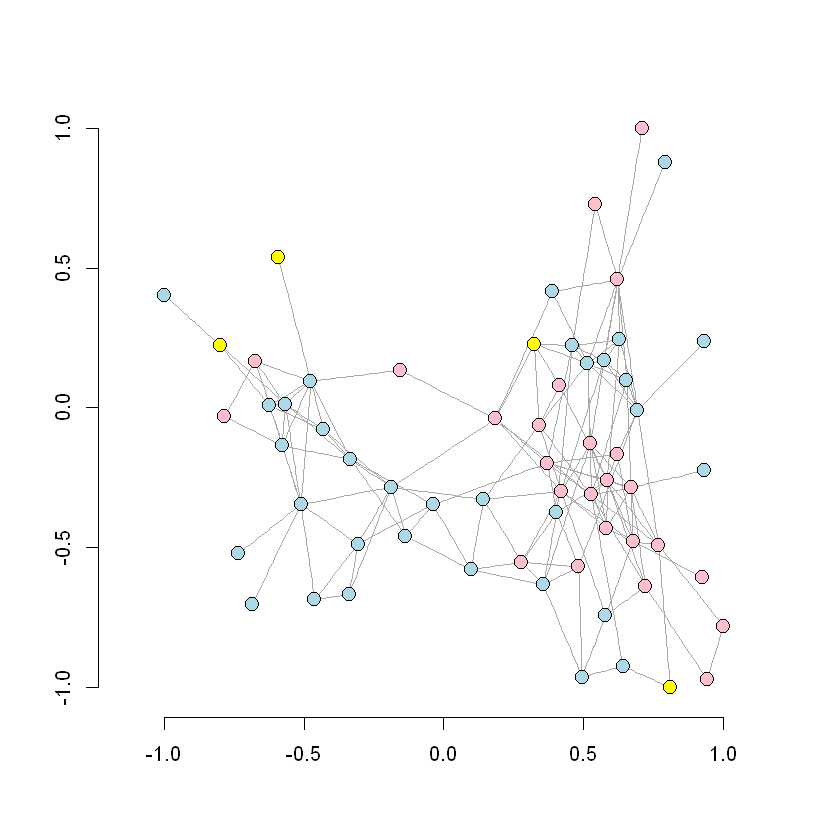

In [17]:
plot(G, vertex.size = 5, vertex.label = NA, layout.sphere(G))

**1.16 What patterns do you see and realization gain by looking at the graph?**

Answer:

- a lot of edges in the lightblue component
- a lot of edges in the pink component
- less edges between the componennts

## Part 2 - Finishing touch

Handing in the assignment requires following steps:

**Checking if the code works if sequentielly executed**
- restart the kernel to clear the current workspace variables
- run all cells (menu: cell - runall)

**Handin**
- Save current progress ('ctrl + s')
- Commit and push to your own fork
- Dance

![alt text](./img/giphy.gif "Dance!")